In [20]:
import numpy as np
X_train = np.load("reshaped_14.npy")
np.random.seed(42)

In [21]:
def layer(w,x,b):
    out = np.dot(x,w)+b.T
    return out
# the sigmoid function
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

# derivative of sigmoid function
def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu(x):
    res = x
    return res * (res > 0)

def derivative_relu(x):
    res = x
    return res * (res > 1)


In [22]:
flat = X_train[0].shape
print(flat)
epochs = 10
in_dim = flat[0]*flat[1]
X=X_train.reshape(len(X_train),flat[0]*flat[1])
print(X.shape)
# rescaled
X=X/255.0

(14, 14)
(60000, 196)


In [23]:
hidden_nodes=40
learning_rate = 1e-5
Lambda=0.1
W_mean = np.random.normal(0,1e-5,(in_dim,hidden_nodes)) # corresponding to mean dimensions
W_covar = np.random.normal(0,1e-5,(in_dim,hidden_nodes)) # corresponding to log covariance
W_decoder = np.random.normal(0,1e-5,(hidden_nodes,in_dim)) # corresponding to decoder part
b_mean=np.random.normal(0,1e-5,(hidden_nodes,1))
b_covar=np.random.normal(0,1e-5,(hidden_nodes,1))
b_decoder=np.random.normal(0,1e-5,(in_dim,1))
nsamples = len(X)

In [24]:
def backprop(delta,z):
    sum1=np.sum(delta,axis=0)
    sum1=sum1.reshape(len(sum1),1)
    bias = sum1
    total = np.matmul(z.T,delta)
    return total,bias

def smi(delta,W,z):
    delta_l1 = np.matmul(delta,W.T)
    sm = derivative_sigmoid(z)*delta_l1
    return sm

def sm_relu(delta,W,z):
    delta_l1 = np.matmul(delta,W.T)
    sm = derivative_relu(z)*delta_l1
    return sm

In [25]:
epochs = 250
batchsize=100
# learning_rate=1e-5
num_iter = (int)(nsamples/batchsize)
for i in range(epochs):
    loss = 0
    for j in range(num_iter):
        total_1 = np.zeros(W_mean.shape)
        total_2 = np.zeros(W_covar.shape)
        total_3 = np.zeros(W_decoder.shape)
        bias_1 = np.zeros(b_mean.shape)
        bias_2 = np.zeros(b_covar.shape)
        bias_3 = np.zeros(b_decoder.shape)
    # forward pass
        X1 = X[j*batchsize:(j+1)*batchsize]
    # the random latent variable
        mean = np.zeros(len(b_mean))
        var = np.eye(len(b_mean))
        a = np.random.multivariate_normal(mean,var,batchsize)
#         print(a.shape)
        a = a.reshape(len(a),len(a[0]))
#     print(a.shape)
        out_1 = layer(W_mean,X1,b_mean)
        out_2 = layer(W_covar,X1,b_covar)
        zmean = sigmoid(out_1)
        zlogvar = sigmoid(out_2)
    
        z = zmean + np.exp(0.5*zlogvar)*a
        out_3 = layer(W_decoder,z,b_decoder)
        y_pred = sigmoid(out_3)
    
    # the loss
        loss1 = np.sum((y_pred-X1)**2)
        loss2 = Lambda*0.5*np.sum(np.exp(zlogvar)+(zmean)**2-1-zlogvar)
        loss = loss+loss1+loss2
#         print(i,j,loss)
    
    # backprop
    
    ## decoder
        delta = 2*(y_pred-X1)*derivative_sigmoid(out_3)
        tot,bia = backprop(delta,z)
        total_3 = total_3 + tot
        bias_3 = bias_3 + bia
    
    ## encoder's mean part
        sm = smi(delta,W_decoder,out_1)
        sm_mean = sm + Lambda*zmean*derivative_sigmoid(out_1)
        tot,bia = backprop(sm_mean,X1)
        total_1 = total_1 + tot
        bias_1 = bias_1 +bia
    
    ## encoder's covar part 
        sm1 = smi(delta,W_decoder,out_2)
        sm_covar = 0.5*sm1*a*np.exp(0.5*zlogvar) + Lambda*0.5*(np.exp(zlogvar)-1)*derivative_sigmoid(out_2)
        tot,bia = backprop(sm_covar,X1)
        total_2 = total_2 + tot
        bias_2 = bias_2 + bia
    ## backprop:
        b_decoder = b_decoder - learning_rate*bias_3
        b_mean = b_mean - learning_rate*bias_1
        b_covar = b_covar - learning_rate*bias_2
        W_decoder = W_decoder - learning_rate*total_3
        W_mean = W_mean - learning_rate*total_1
        W_covar = W_covar - learning_rate*total_2
    print("epoch: "+str(i) +" "+"loss: "+str(loss))

epoch: 0 loss: 1621299.285018625
epoch: 1 loss: 934159.6174995744
epoch: 2 loss: 812914.0430264266
epoch: 3 loss: 774986.780861857
epoch: 4 loss: 756604.2469461369
epoch: 5 loss: 744766.6898205557
epoch: 6 loss: 738195.1964611991
epoch: 7 loss: 732821.0429646148
epoch: 8 loss: 729271.9083741143
epoch: 9 loss: 724689.97399136
epoch: 10 loss: 722475.8759814985
epoch: 11 loss: 719898.5182960989
epoch: 12 loss: 717233.2506341678
epoch: 13 loss: 715575.9595045334
epoch: 14 loss: 713080.2310419815
epoch: 15 loss: 711098.2638798507
epoch: 16 loss: 709831.9130892553
epoch: 17 loss: 707273.9667716295
epoch: 18 loss: 705979.2674623342
epoch: 19 loss: 704347.0935813136
epoch: 20 loss: 702184.1980990529
epoch: 21 loss: 701198.5517399225
epoch: 22 loss: 699221.7435413995
epoch: 23 loss: 698161.7634205192
epoch: 24 loss: 696016.9599095992
epoch: 25 loss: 694784.672658854
epoch: 26 loss: 693545.5078971473
epoch: 27 loss: 692229.4507355745
epoch: 28 loss: 690889.8986932985
epoch: 29 loss: 688843.85672

epoch: 238 loss: 608844.3348235387
epoch: 239 loss: 607932.534534108
epoch: 240 loss: 608049.2682277338
epoch: 241 loss: 607486.316271285
epoch: 242 loss: 607352.5179506629
epoch: 243 loss: 607237.6952725867
epoch: 244 loss: 606956.9552920867
epoch: 245 loss: 606468.513297532
epoch: 246 loss: 606530.9385183968
epoch: 247 loss: 605652.1339681689
epoch: 248 loss: 606167.2805495469
epoch: 249 loss: 605264.283202816


In [26]:
import matplotlib.pyplot as plt
z1 = np.random.normal(0,1,(1000,40))
out = layer(W_decoder,z1,b_decoder)
y1 = sigmoid(out)

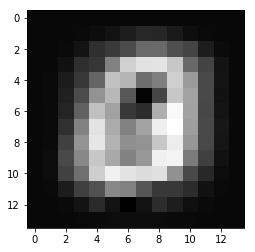

In [32]:
y2 = y1[-1]*255
y2 = y2.reshape(14,14)
plt.imshow(y2,cmap='gray')
plt.show()